# Pymaceuticals Inc.
---

### Analysis

- We learned several different things from the results yielded from Pymaceuticals. From the 249 mice that were given, we could see that it was an almost an even split of fifty-fifty between male and female mice. Nine different drugs were tested on the mice to see which would reduce tumors more effectively. The most effective drug was Ramicane, according to the results. The second most effective was Capomulin. The least effective drug was Infubinol. From the results, we can conclude that both Ramicane and Capomulin are the most effective drugs to reduce tumor sizes.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].unique())
print("Number of Mice: ", number_of_mice)

Number of Mice:  249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice_df = pd.DataFrame(duplicate_mice)
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_data_df = pd.DataFrame(duplicate_data)
duplicate_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
clean_data_df = pd.DataFrame(clean_data)
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data)
print("Number of Mice in the clean DataFrame:", num_mice)

Number of Mice in the clean DataFrame: 1883


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame(columns=['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
for name, group in regimen_group:
    mean = group['Tumor Volume (mm3)'].mean()
    median = group['Tumor Volume (mm3)'].median()
    variance = group['Tumor Volume (mm3)'].var()
    std_dev = group['Tumor Volume (mm3)'].std()
    sem = group['Tumor Volume (mm3)'].sem()
    summary_stats.loc[name] = [mean, median, variance, std_dev, sem]
    
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame(summary_stats)
display(summary_stats_df)

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

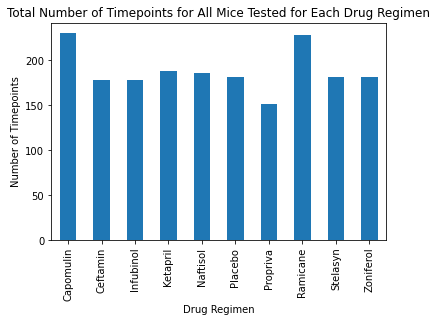

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = clean_data.groupby('Drug Regimen')['Timepoint'].count()
data.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.show()

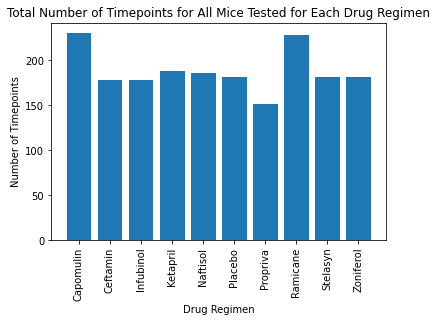

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np
timepoints_count = clean_data.groupby('Drug Regimen')['Timepoint'].count()
plt.bar(np.arange(len(timepoints_count)), timepoints_count.values)
plt.xticks(np.arange(len(timepoints_count)), timepoints_count.index, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.show()

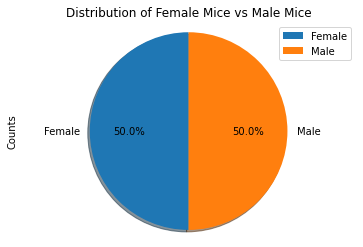

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
import matplotlib.pyplot as plt

#Data Frame
data = {'Sex': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male']}
df = pd.DataFrame(data)

# Group the data by Sex and count the number of occurances of each gender
gender_count = df.groupby('Sex').size().reset_index(name='Counts')

# Pie plot
gender_count.plot.pie(y='Counts', labels=gender_count['Sex'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Female Mice vs Male Mice')
plt.legend(loc="best")
plt.axis('equal')
plt.show()

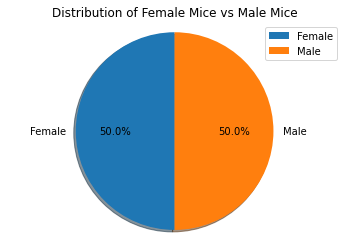

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = {'Sex': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male']}
df = pd.DataFrame(data)
gender_count = df.groupby('Sex').size().reset_index(name='Counts')
plt.pie(gender_count['Counts'], labels=gender_count['Sex'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Female Mice vs Male Mice')
plt.legend(loc="best")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_data.groupby(['Mouse ID']).max()['Timepoint']
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volumes = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
final_tumor_volumes

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    print(f"{treatment}:")
    print("----------------------------")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Outliers:")
    if not outliers.empty:
        print(outliers)
    else:
        print("None")
    print("----------------------------")

Capomulin:
----------------------------
Outliers:
None
----------------------------
Ramicane:
----------------------------
Outliers:
None
----------------------------
Infubinol:
----------------------------
Outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
----------------------------
Ceftamin:
----------------------------
Outliers:
None
----------------------------


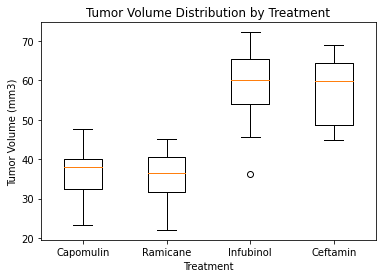

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

tumor_volumes = final_tumor_vol

fig, ax = plt.subplots()

ax.boxplot(tumor_volumes, labels=treatments)

ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Treatment')

ax.set_ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

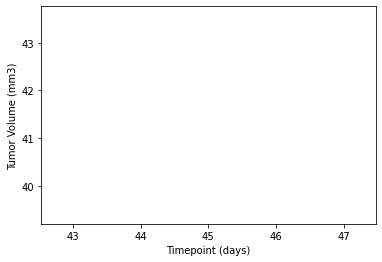

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

capomulin_data = merged_df.loc[(merged_df['Drug Regimen'] == 'Capomulin') & (merged_df['Mouse ID'] == 'l509')]

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

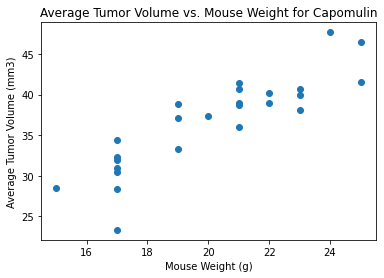

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

capomulin_data = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

capomulin_grouped = capomulin_data.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.show()

## Correlation and Regression

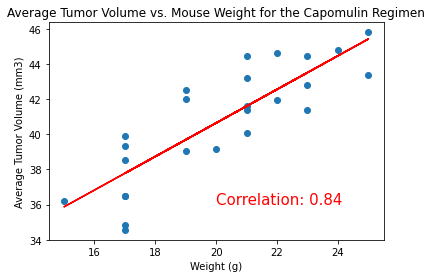

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]

grouped_df = capomulin_df.groupby(["Mouse ID"])

weight = grouped_df["Weight (g)"].mean()

tumor_vol = grouped_df["Tumor Volume (mm3)"].mean()

plt.scatter(weight, tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

correlation = round(st.pearsonr(weight, tumor_vol)[0],2)

slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, tumor_vol)

regress_values = weight * slope + intercept

plt.plot(weight,regress_values,"r-")

plt.annotate(f'Correlation: {correlation}',(20,36),fontsize=15,color="red")

plt.show()